In [1]:
#!pip install -U statsmodels

In [2]:
#!pip install pmdarima

In [3]:
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pmdarima as pm

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


## Lendo e plotando dataframe

In [4]:
df = pd.read_excel("morte_armas_australia.xlsx")

In [5]:
df.set_index('Year', inplace=True)

<AxesSubplot:xlabel='Year'>

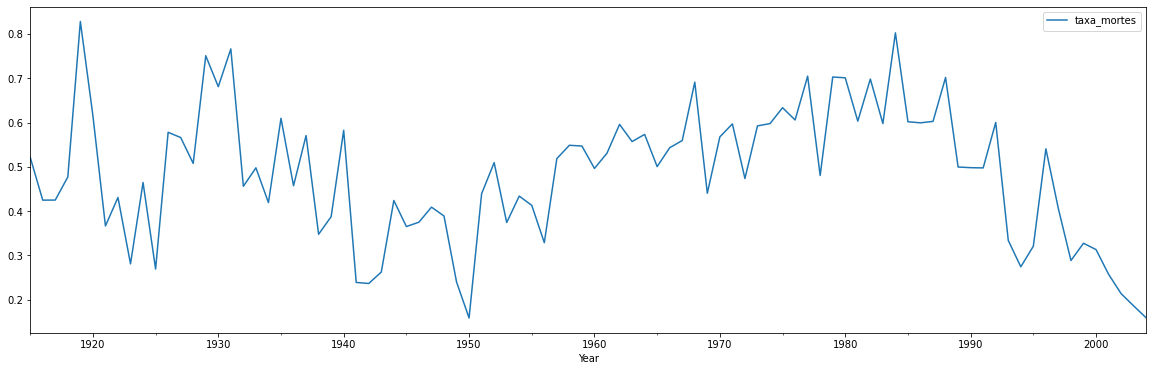

In [6]:
df[['taxa_mortes']].plot(figsize=(20,6))

## Decomposição da séries: tendência, sazonalidade, resíduo

### Periodo de 1 ano

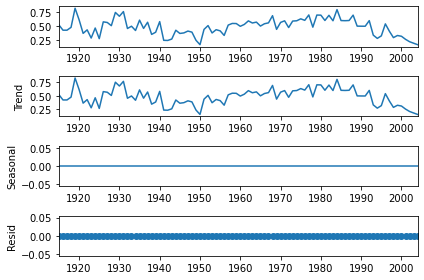

In [29]:
df_decomp = tsa.seasonal_decompose(df, period = 1)
df_decomp.plot();

### Periodo 5 anos

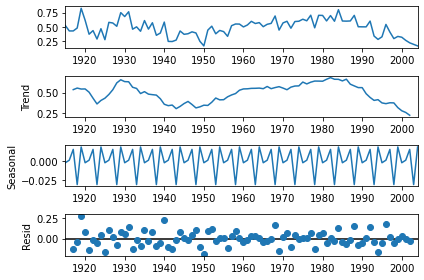

In [7]:
df_decomp = tsa.seasonal_decompose(df, period = 5)
df_decomp.plot();

### Periodo de 10 anos

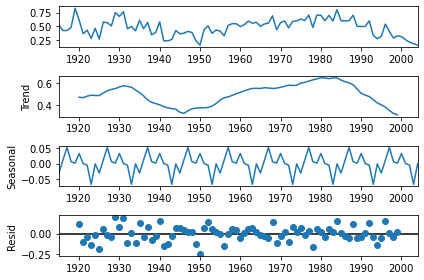

In [8]:
df_decomp = tsa.seasonal_decompose(df, period = 10)
df_decomp.plot();

### Periodo de 15 anos

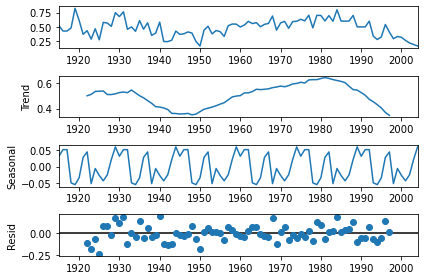

In [10]:
df_decomp = tsa.seasonal_decompose(df, period = 15)
df_decomp.plot();

Observa que a série apresenta um sazonalidade bem definida para periodos maiores que 1 ano e tendência apróximadamente senoidal que fica clara com o aumento do período estudado

## Estacionaridade

Estacionariedade: média e desvio constante ao longo do tempo

Média móvel de 2, 5 e 10 anos

<AxesSubplot:ylabel='Frequency'>

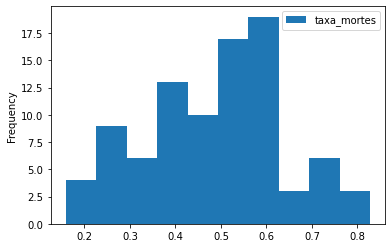

In [21]:
df.plot.hist()

<AxesSubplot:xlabel='Year'>

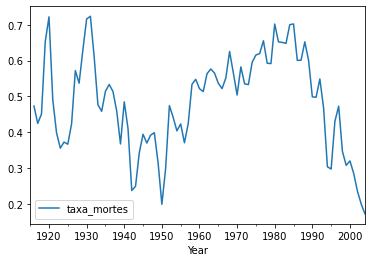

In [16]:
df.rolling(2).mean().plot()

<AxesSubplot:xlabel='Year'>

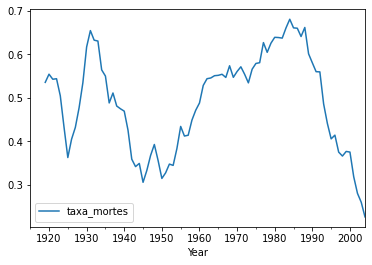

In [17]:
df.rolling(5).mean().plot()

<AxesSubplot:xlabel='Year'>

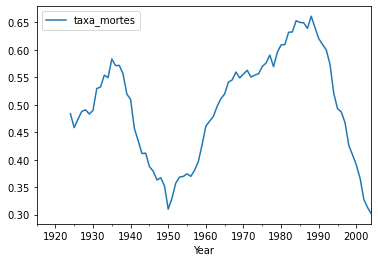

In [18]:
df.rolling(10).mean().plot()

Média movel possui uma tendencia e sazonalidade evidenciando que a série não é estacionária pois as características estatísticas não se mantem constante com o tempo

## Diferenciação

Utiliza a diferenciação para tentar tornar a série estacionária devido ao fato dos modelos existentes terem como premissa uma série estacionária.

In [25]:
dfd1 = df.diff().dropna()

<AxesSubplot:xlabel='Year'>

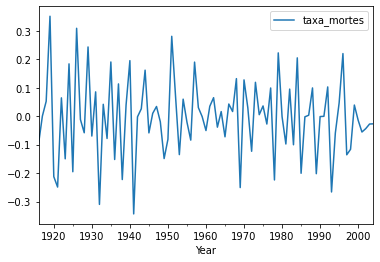

In [26]:
dfd1.plot()

A série agora aprotenta modulos do máximo e mínimo aproximadamente iguais e aparentemente sem tendencias, podendo ainda haver alguma sazonalidade

<AxesSubplot:ylabel='Frequency'>

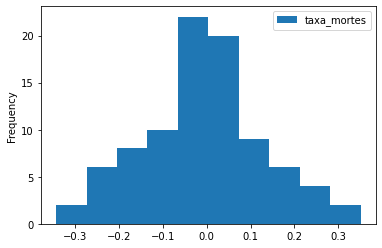

In [30]:
dfd1.plot.hist()

Apresenta uma distribuição aproximadamente normal, indicando uma estacionaridade

In [28]:
test, pvalue, lags, obs, critic, ic = tsa.stattools.adfuller(dfd1, regression='ct')
print(pvalue)
print(lags)

1.7133988986591557e-12
2
